# Employee compensation prediction
## Statement of the problem
The goal of this project is to develop a machine learning model that predicts employee compensation based on various employment and compensation factors. The dataset includes employee information such as 'Name', 'Benefits Category', 'Department', 'Job Title', 'Full/Part Time', 'Hire Date', 'Termination Date', 'Hourly Rate', 'Regular Pay', 'Overtime Pay', and 'Other Pay'. By accurately predicting compensation, the model can help organizations optimize payroll management, ensure fair pay practices, and make data-driven decisions related to compensation planning.



### Variable definition
- Name: Employee’s name.
- Benefits Category: Type of benefits the employee is entitled to.
- Department: Department where the employee works.
- Job Title: Employee’s job position.
- Full/Part Time: Employment status as full-time or part-time.
- Hire Date: The date the employee was hired.
- Termination Date: The date the employee left the organization, if applicable.
- Hourly Rate: The employee’s hourly wage.
- Regular Pay: The employee’s base salary or pay.
- Overtime Pay: Compensation for hours worked beyond regular working hours.
- Other Pay: Additional forms of compensation beyond regular and overtime pay.









#### Data source
The data was obtained from data.world the link to the data is
 https://data.world/city-of-phoenix/2b41f4f8-fe6f-48d3-8097-ad44ee5bd616/workspace/file?filename=employee-compensation-report-calendar-year-2021-6.csv

In [3]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv('/Users/sylviabhoke/Downloads/End to End CompPredictor folder/notebook/data/employee-compensation-report-calendar-year-2021-6.csv')



In [6]:
data.head()

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Unnamed: 11
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,7/15/1991,NaN,37.79,71560.00,0.00,5238.09,NaN
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,12/17/2018,NaN,30.04,58472.80,2480.96,1490.57,NaN
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,1/14/2008,NaN,24.48,65584.91,18186.03,1329.91,NaN
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,12/28/2009,NaN,51.02,104979.20,0.00,1175.32,NaN
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,4/19/2010,NaN,12.92,5131.92,259.68,75.00,NaN


### Data Cleaning
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

In [7]:
data.shape

(15083, 12)

In [8]:
data.columns

Index(['Name', 'Benefits Category', 'Department', 'Job Title',
       'Full/Part Time', 'Hire Date', 'Termination Date', 'Hourly Rate',
       'Regular Pay', 'Overtime Pay', 'Other Pay', 'Unnamed: 11'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15083 entries, 0 to 15082
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               15082 non-null  object 
 1   Benefits Category  15082 non-null  float64
 2   Department         15082 non-null  object 
 3   Job Title          15082 non-null  object 
 4   Full/Part Time     15082 non-null  object 
 5   Hire Date          15082 non-null  object 
 6   Termination Date   1225 non-null   object 
 7   Hourly Rate        15082 non-null  float64
 8   Regular Pay        15082 non-null  float64
 9   Overtime Pay       15082 non-null  float64
 10  Other Pay          15082 non-null  float64
 11  Unnamed: 11        0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 1.4+ MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Benefits Category,15082.0,100.276157,293.146069,1.00,3.0000,5.000,7.000,999.00
Hourly Rate,15082.0,30.774489,11.896322,12.72,22.5100,28.410,37.790,177.89
Regular Pay,15082.0,57707.117620,30373.101982,0.00,39255.4000,58145.600,77606.400,273372.48
Overtime Pay,15082.0,5541.316220,12752.758368,-485.64,0.0000,513.120,4993.925,217212.59
Other Pay,15082.0,4182.628811,9273.389135,-1200.00,107.8125,2191.755,4975.000,261035.69
Unnamed: 11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe(include='object').T

,count,unique,top,freq
Name,15082,15060,"Jimenez,Melissa",2
Department,15082,35,Police Department,4205
Job Title,15082,764,Police Officer,2459
Full/Part Time,15082,2,F,13638
Hire Date,15082,1323,4/19/2021,155
Termination Date,1225,307,10/15/2021,33


In [12]:
data.isnull().sum()

Name                     1
Benefits Category        1
Department               1
Job Title                1
Full/Part Time           1
Hire Date                1
Termination Date     13858
Hourly Rate              1
Regular Pay              1
Overtime Pay             1
Other Pay                1
Unnamed: 11          15083
dtype: int64

In [13]:
# dropping the Unnamed column cause it has no values
data.drop('Unnamed: 11', axis=1, inplace=True)

In [14]:
#dropping the Termination Date as it has alot of missing values
data = data.drop('Termination Date',axis=1)

In [15]:
data = data.drop('Name',axis=1)

In [16]:
#dropping missing values
data = data.dropna()

In [17]:
data.duplicated().sum()


103

In [18]:
data.apply(lambda x: len(x.unique()))

Benefits Category       18
Department              35
Job Title              764
Full/Part Time           2
Hire Date             1323
Hourly Rate            622
Regular Pay           9682
Overtime Pay          8558
Other Pay            10066
dtype: int64

## EXPLORATORY DATA ANALYSIS
We are going to dive deep into the data by going through the variables one by one

In [19]:
# Getting all different types of features
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print(f'Numerical Features:', num_features)

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print(f'Categorical Features:', cat_features)

discrete_features = [feature for feature in num_features if len(data[feature].unique()) <= 25]
print(f'Discrete Features:', discrete_features)

continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(f'Continuous Features:', continuous_features)


Numerical Features: ['Benefits Category', 'Hourly Rate', 'Regular Pay', 'Overtime Pay', 'Other Pay']
Categorical Features: ['Department', 'Job Title', 'Full/Part Time', 'Hire Date']
Discrete Features: ['Benefits Category']
Continuous Features: ['Hourly Rate', 'Regular Pay', 'Overtime Pay', 'Other Pay']


## Numerical columns

In [20]:
Numerical_columns = data.select_dtypes(include=np.number).columns
Numerical_columns

Index(['Benefits Category', 'Hourly Rate', 'Regular Pay', 'Overtime Pay',
       'Other Pay'],
      dtype='object')

#### **Benefits Category**

In [21]:
data['Benefits Category'].value_counts()

Benefits Category
7.0      3579
4.0      2524
3.0      2273
5.0      1689
2.0      1581
999.0    1033
1.0       950
6.0       473
998.0     418
9.0       271
10.0       92
8.0        88
17.0       60
16.0       24
11.0       11
18.0        7
19.0        7
12.0        2
Name: count, dtype: int64

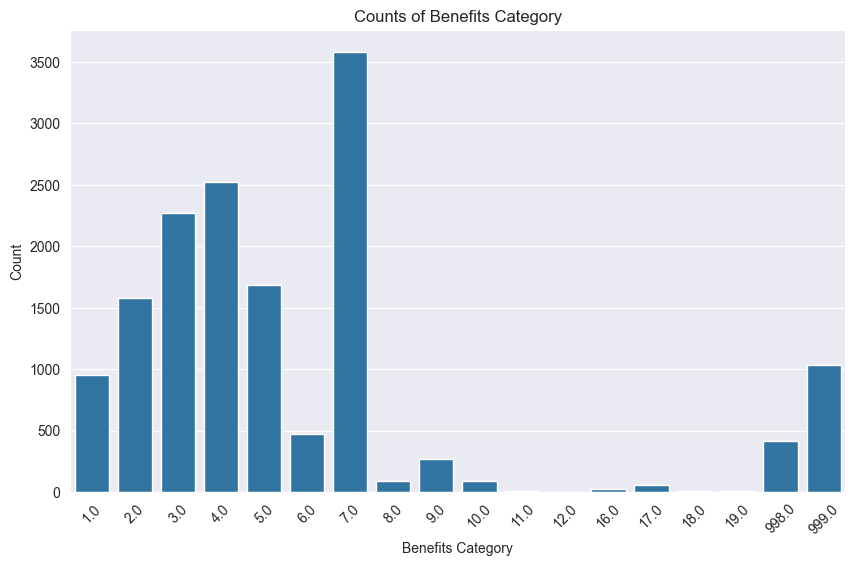

In [22]:
# Convert the 'Benefits Category' column to a categorical type
data['Benefits Category'] = data['Benefits Category'].astype('category')
plt.figure(figsize=(10,6))
sns.barplot(x=data['Benefits Category'].value_counts().index, 
            y=data['Benefits Category'].value_counts().values)

plt.title('Counts of Benefits Category')
plt.xlabel('Benefits Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### **Hourly Rate**

In [23]:
data['Hourly Rate'].value_counts()

Hourly Rate
37.79    1520
15.55     459
41.78     270
28.41     252
33.55     252
         ... 
27.40       1
19.47       1
46.45       1
62.08       1
28.36       1
Name: count, Length: 622, dtype: int64

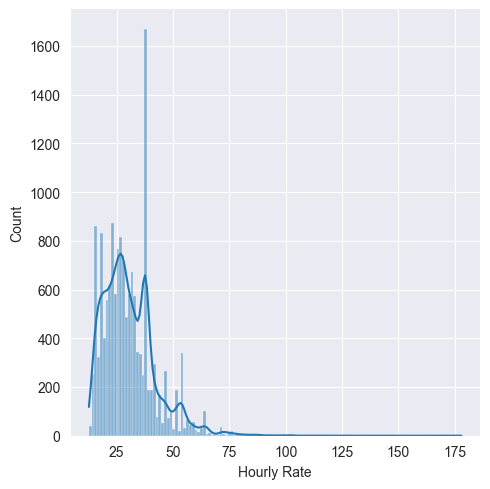

In [24]:
####visual representation of the column
sns.displot(data['Hourly Rate'],kde=True,palette='pastel')

The data appears to be normally distributed.

<Axes: ylabel='Hourly Rate'>

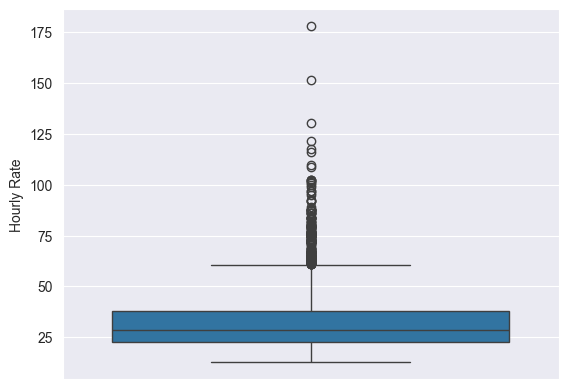

In [25]:
### Checking for ouliers
sns.boxplot(data['Hourly Rate'])

<Axes: ylabel='Hourly Rate'>

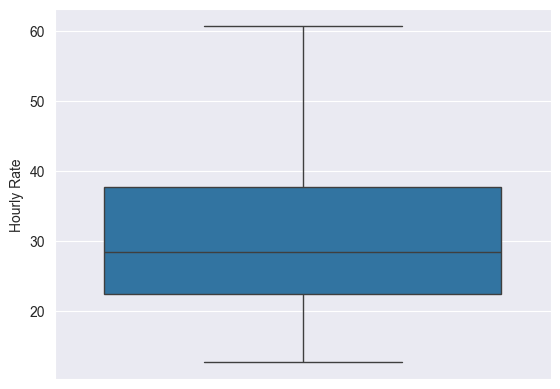

In [26]:
##correcting the ouliers


Q1 = data['Hourly Rate'].quantile(0.25)
Q3 = data['Hourly Rate'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
data['Hourly Rate'] = np.where(data['Hourly Rate'] < lower_bound, lower_bound, data['Hourly Rate'])
data['Hourly Rate'] = np.where(data['Hourly Rate'] > upper_bound, upper_bound, data['Hourly Rate'])

# Visualize again to check
sns.boxplot(data['Hourly Rate'])



#### **Regular Pay**

In [27]:
data['Regular Pay'].value_counts()

Regular Pay
77606.40     1225
85972.80      193
110785.60     155
95086.40      153
104979.20     127
             ... 
38448.01        1
63605.44        1
26129.83        1
50156.48        1
70553.60        1
Name: count, Length: 9682, dtype: int64

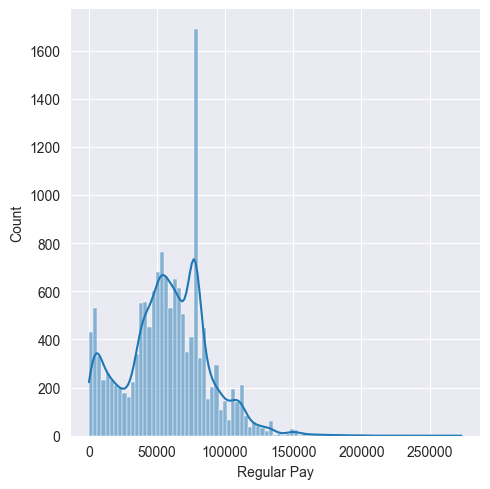

In [28]:
#visual representation of the column
sns.displot(data['Regular Pay'],kde=True,palette='pastel')

The data is also normally distributed.

<Axes: ylabel='Regular Pay'>

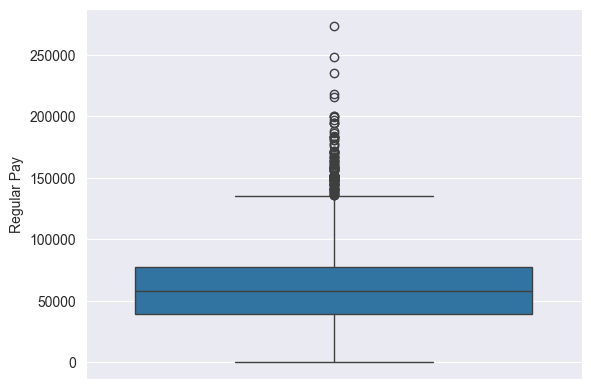

In [29]:
#checking for outliers
sns.boxplot(data['Regular Pay'])

<Axes: ylabel='Regular Pay'>

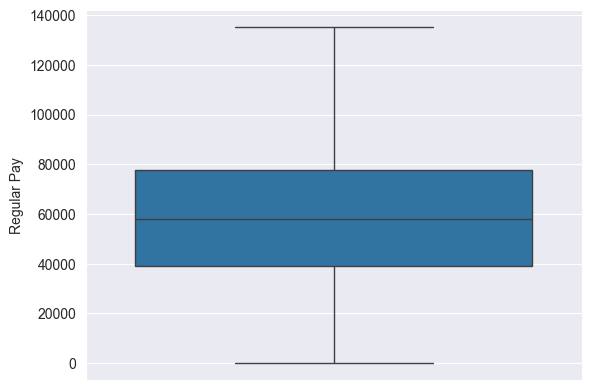

In [30]:
##Handling the outliers
Q1 = data['Regular Pay'].quantile(0.25)
Q3 = data['Regular Pay'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
data['Regular Pay'] = np.where(data['Regular Pay'] < lower_bound, lower_bound, data['Regular Pay'])
data['Regular Pay'] = np.where(data['Regular Pay'] > upper_bound, upper_bound, data['Regular Pay'])

# Visualize again to check
sns.boxplot(data['Regular Pay'])

#### **Overtime Pay**

In [31]:
data['Overtime Pay'].value_counts()

Overtime Pay
0.00        5966
295.20        42
590.40        22
2500.00       18
3347.46       18
            ... 
13700.34       1
34601.35       1
4486.73        1
965.28         1
659.13         1
Name: count, Length: 8558, dtype: int64

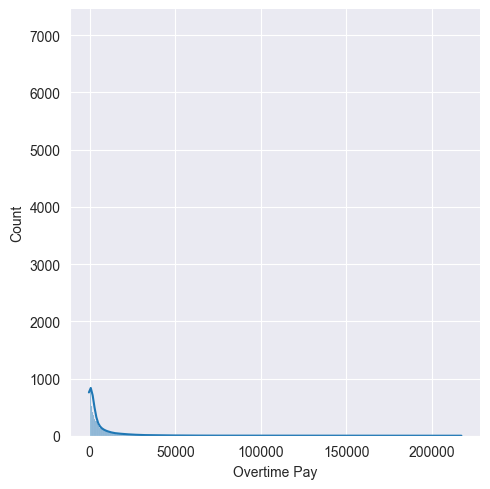

In [32]:
#visual representation of the column
sns.displot(data['Overtime Pay'],kde=True,palette='pastel')

Most employees do not get overtime pay

<Axes: ylabel='Overtime Pay'>

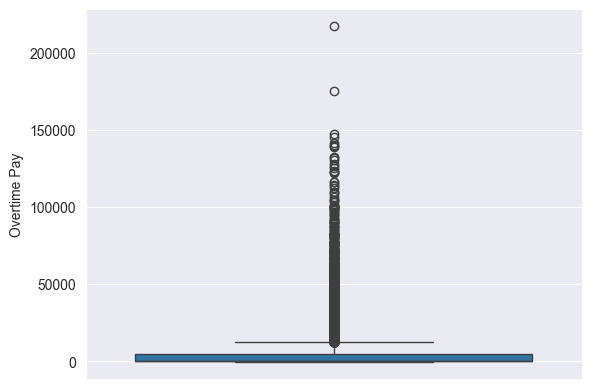

In [33]:
#checking for outliers
sns.boxplot(data['Overtime Pay'])

<Axes: ylabel='Overtime Pay'>

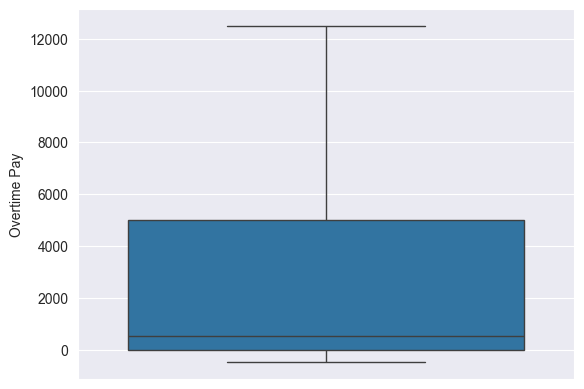

In [34]:
##Handling the outliers
Q1 = data['Overtime Pay'].quantile(0.25)
Q3 = data['Overtime Pay'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
data['Overtime Pay'] = np.where(data['Overtime Pay'] < lower_bound, lower_bound, data['Overtime Pay'])
data['Overtime Pay'] = np.where(data['Overtime Pay'] > upper_bound, upper_bound, data['Overtime Pay'])

# Visualize again to check
sns.boxplot(data['Overtime Pay'])

#### **Other Pay**

In [35]:
data['Other Pay'].value_counts()

Other Pay
75.00       1607
0.00        1061
129.75       166
4975.00       72
1150.00       60
            ... 
10565.69       1
692.40         1
7029.20        1
413.55         1
4877.69        1
Name: count, Length: 10066, dtype: int64

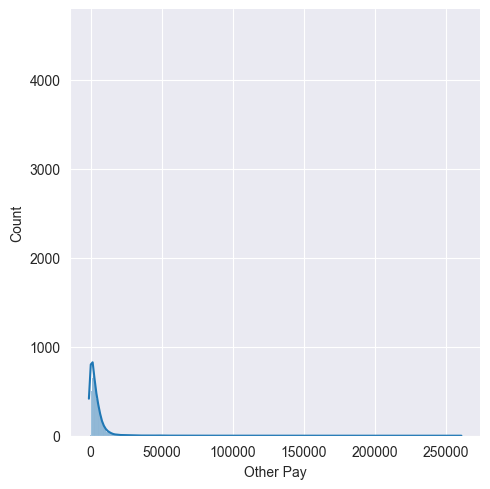

In [36]:
#visual representation of the column
sns.displot(data['Other Pay'],kde=True,palette='pastel')

Other employees also do not get  other pay.

<Axes: ylabel='Other Pay'>

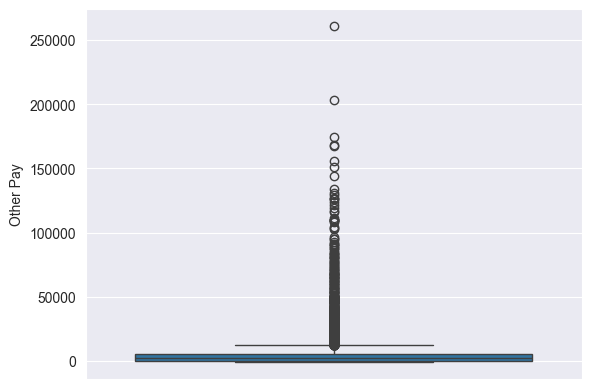

In [37]:
#checking for outliers
sns.boxplot(data['Other Pay'])

<Axes: ylabel='Other Pay'>

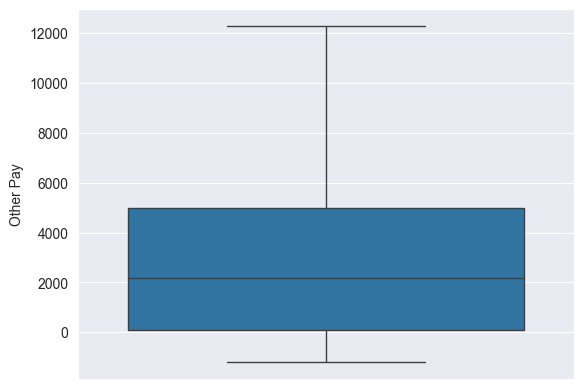

In [38]:
##Handling the outliers
Q1 = data['Other Pay'].quantile(0.25)
Q3 = data['Other Pay'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
data['Other Pay'] = np.where(data['Other Pay'] < lower_bound, lower_bound, data['Other Pay'])
data['Other Pay'] = np.where(data['Other Pay'] > upper_bound, upper_bound, data['Other Pay'])

# Visualize again to check
sns.boxplot(data['Other Pay'])

## Categorical columns

In [39]:
Categoprical_columns = data.select_dtypes(include='object').columns
Categoprical_columns

Index(['Department', 'Job Title', 'Full/Part Time', 'Hire Date'], dtype='object')

#### **Department**

In [40]:
data['Department'].value_counts()

Department
Police Department                 4205
Fire Department                   2142
Water Services Department         1400
Public Works Department           1065
Aviation                           798
Parks and Recreation Dept.         714
Street Transportation Dept         639
Library Department                 537
Planning & Development Dept        463
Parks & Rec. Part-time EEs         452
Human Services Department          372
Parks & Recreation: Aquatics       327
Municipal Court                    300
City Attorney & City Prosec.       206
Phoenix Convention Center          206
Information Technology Depart.     192
Finance Department                 192
Neighborhood Services Dept         165
Housing Dept                       118
Human Resources                    116
Public Transit                     113
City Clerk                          57
Community & Economic Develop        49
Office Of Admin. Services           46
Equal Opportunity Department        28
Office Of The 

We are having quite a number of departments.We cant label encode all the departments as our model might favour others, instead we are going to group them further into two;popular and unpopular departments.

<Axes: xlabel='count', ylabel='Department'>

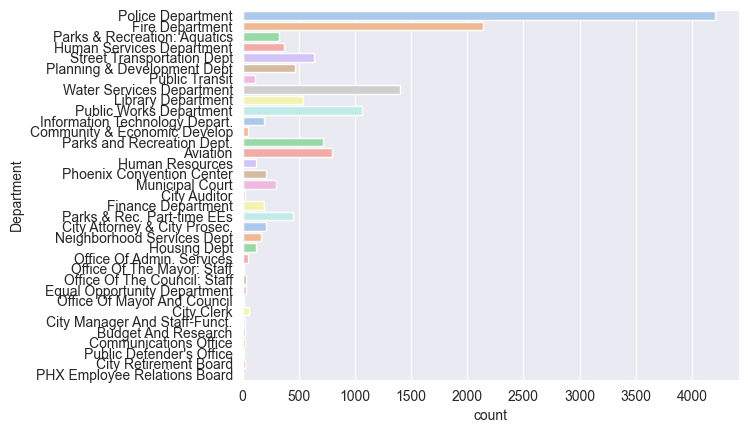

In [41]:
sns.countplot(data['Department'],palette='pastel')

### Job Title

In [42]:
data['Job Title'].value_counts()

Job Title
Police Officer                    2459
Firefighter 56hr                   868
Police Sergeant                    390
Fire Captain 56hr                  354
Fire Engineer 56hr                 350
                                  ... 
Records Clerk III                    1
Curriculum/Trng Coord*Supv Dev       1
Elections Coord*Citizen Supprt       1
Fire Chief (NC)                      1
Const Permit Supv                    1
Name: count, Length: 764, dtype: int64

### Full/Part Time

In [43]:
data['Full/Part Time'].value_counts()

Full/Part Time
F    13638
P     1444
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Full/Part Time'>

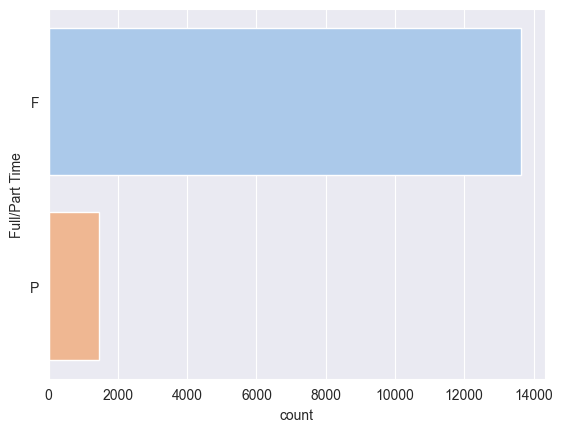

In [44]:
sns.countplot(data['Full/Part Time'],palette='pastel')

### Hire Date

In [45]:
data['Hire Date'].value_counts()

Hire Date
4/19/2021    155
11/1/2021    101
6/17/2019     85
5/31/2021     84
10/7/2019     77
            ... 
4/28/2015      1
2/5/1979       1
7/17/1989      1
10/1/1984      1
4/2/1987       1
Name: count, Length: 1323, dtype: int64

Using the the Hire date we are going to create a column called Period_Worked.


In [46]:
#converting the Hire date to a datetime format
data['Hire Date'] = pd.to_datetime(data['Hire Date'])



In [47]:
# Find the latest (maximum) hire date in the dataset
latest_hire_date = data['Hire Date'].max()

# Calculate the period worked for each employee
data['Period_worked'] = (latest_hire_date - data['Hire Date']).dt.days

# Output the dataframe with the new column
print(data[['Hire Date', 'Period_worked']])

       Hire Date  Period_worked
0     1991-07-15          11109
1     2018-12-17           1092
2     2008-01-14           5082
3     2009-12-28           4368
4     2010-04-19           4256
...          ...            ...
15077 2002-11-25           6958
15078 1999-06-28           8204
15079 2019-05-06            952
15080 2017-03-27           1722
15081 2011-08-08           3780

[15082 rows x 2 columns]


In [48]:
data['Period_worked'].astype(int)

0        11109
1         1092
2         5082
3         4368
4         4256
         ...  
15077     6958
15078     8204
15079      952
15080     1722
15081     3780
Name: Period_worked, Length: 15082, dtype: int64

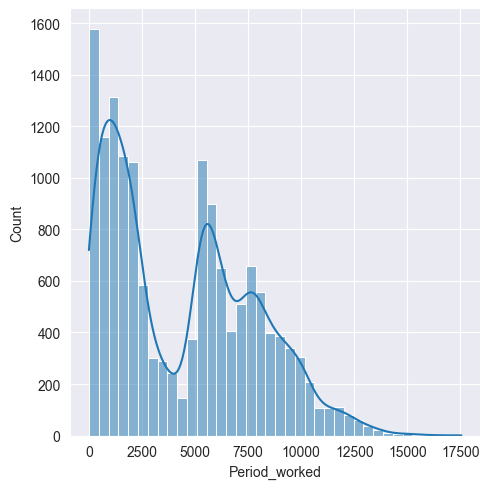

In [49]:
sns.displot(data['Period_worked'],kde=True,palette='pastel')

<Axes: ylabel='Period_worked'>

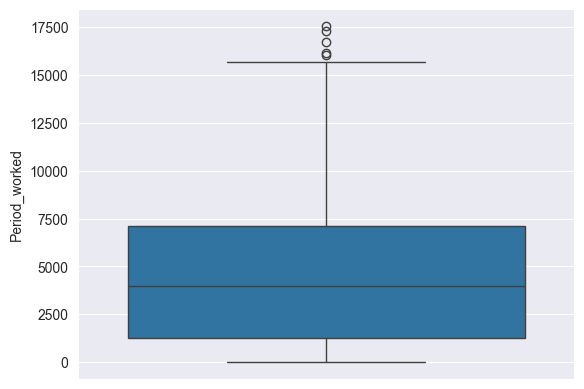

In [50]:
sns.boxplot(data['Period_worked'])

In [51]:
#dropping the Hire date column as we will not be using it anymore
data = data.drop('Hire Date',axis=1)

<Axes: ylabel='Period_worked'>

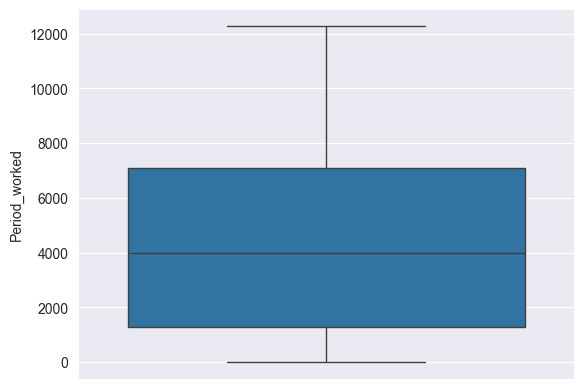

In [52]:
##Handling the outliers
Q1 = data['Other Pay'].quantile(0.25)
Q3 = data['Other Pay'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
data['Period_worked'] = np.where(data['Period_worked'] < lower_bound, lower_bound, data['Period_worked'])
data['Period_worked'] = np.where(data['Period_worked'] > upper_bound, upper_bound, data['Period_worked'])

# Visualize again to check
sns.boxplot(data['Period_worked'])

#### Target column
We are going to create our Target column which is Total compensation by adding Regular pay,Overtime Pay and Period worked.

In [53]:
data['Total_compensation'] = data['Regular Pay'] + data['Overtime Pay'] + data['Period_worked']

In [54]:
data['Total_compensation'].value_counts()

Total_compensation
6163.7500     45
3636.4000     10
94361.2125     9
55736.8000     8
95313.2125     7
              ..
76712.1600     1
68253.2000     1
5362.0000      1
54887.6000     1
74992.7300     1
Name: count, Length: 14532, dtype: int64

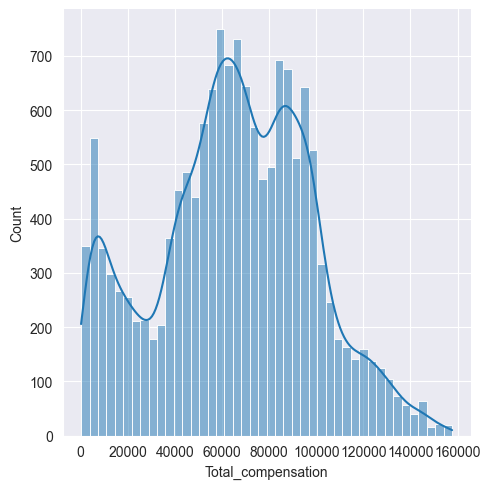

In [55]:
sns.displot(data['Total_compensation'],kde=True,palette='pastel')

The data is normally distributed.

In [56]:
data

,Benefits Category,Department,Job Title,Full/Part Time,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Period_worked,Total_compensation
0,4.0,Police Department,Police Officer,F,37.79,71560.00,0.0000,5238.09,11109.0,82669.0000
1,4.0,Police Department,Police Officer,F,30.04,58472.80,2480.9600,1490.57,1092.0,62045.7600
2,5.0,Fire Department,Firefighter 56hr,F,24.48,65584.91,12484.8125,1329.91,5082.0,83151.7225
3,7.0,Police Department,Forensic Scientist IV,F,51.02,104979.20,0.0000,1175.32,4368.0,109347.2000
4,998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,12.92,5131.92,259.6800,75.00,4256.0,9647.6000
...,...,...,...,...,...,...,...,...,...,...
15077,4.0,Police Department,Police Officer,F,37.79,77606.40,12484.8125,9888.24,6958.0,97049.2125
15078,7.0,Municipal Court,Management Asst II,F,46.21,95086.40,0.0000,1886.60,8204.0,103290.4000
15079,1.0,Public Works Department,Solid Waste Equipment Operator,F,21.43,43489.92,8826.2900,29.93,952.0,53268.2100
15080,4.0,Police Department,Police Officer,F,31.75,64827.10,2699.1200,1423.74,1722.0,69248.2200


In [57]:
data = data.drop(['Regular Pay','Overtime Pay','Other Pay'],axis=1)

## Model building

In [58]:
## Getting All Different Types OF Features
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print(f'Numerical Features :',num_features)
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print(f'Categorical Features :', cat_features)
discrete_features=[feature for feature in num_features if len(data[feature].unique())<=25]
print('Discrete Features :',discrete_features)
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Continuous Features :',continuous_features)

Numerical Features : ['Benefits Category', 'Hourly Rate', 'Period_worked', 'Total_compensation']
Categorical Features : ['Department', 'Job Title', 'Full/Part Time']
Discrete Features : ['Benefits Category']
Continuous Features : ['Hourly Rate', 'Period_worked', 'Total_compensation']


In [59]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = data.drop(['Total_compensation'], axis=1)
y = data['Total_compensation']

In [60]:
X.head()

,Benefits Category,Department,Job Title,Full/Part Time,Hourly Rate,Period_worked
0,4.0,Police Department,Police Officer,F,37.79,11109.0
1,4.0,Police Department,Police Officer,F,30.04,1092.0
2,5.0,Fire Department,Firefighter 56hr,F,24.48,5082.0
3,7.0,Police Department,Forensic Scientist IV,F,51.02,4368.0
4,998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,12.92,4256.0


### Feature Encoding and Scaling
One Hot Encoding for Columns which had lesser unique values and not ordinal


In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Department']=le.fit_transform(X['Department'])
X['Job Title']=le.fit_transform(X['Job Title'])


In [62]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['Full/Part Time']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)

    ],remainder='passthrough'

)

In [63]:
X=preprocessor.fit_transform(X)

In [64]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,0.0,-0.328435,0.628173,0.591966,0.664061,2.004420
1,0.0,-0.328435,0.628173,0.591966,-0.044261,-0.975949
2,0.0,-0.325023,-1.151187,-0.462481,-0.552426,0.211200
3,0.0,-0.318201,0.628173,-0.411542,1.873237,-0.001237
4,1.0,3.062479,0.232760,0.388208,-1.608969,-0.034561
...,...,...,...,...,...,...
15077,0.0,-0.328435,0.628173,0.591966,0.664061,0.769368
15078,0.0,-0.318201,-0.558067,0.133511,1.433620,1.140092
15079,0.0,-0.338669,0.924733,1.167582,-0.831185,-1.017603
15080,0.0,-0.328435,0.628173,0.591966,0.112027,-0.788504


In [65]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12065, 6), (3017, 6))

### Model Training And Model Selection

In [66]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [68]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [69]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 16481.4872
- Mean Absolute Error: 10918.9958
- R2 Score: 0.7494
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16677.6274
- Mean Absolute Error: 10948.4334
- R2 Score: 0.7504


Lasso
Model performance for Training set
- Root Mean Squared Error: 16481.5082
- Mean Absolute Error: 10918.2094
- R2 Score: 0.7494
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16677.9773
- Mean Absolute Error: 10947.7723
- R2 Score: 0.7504


Ridge
Model performance for Training set
- Root Mean Squared Error: 16481.5157
- Mean Absolute Error: 10918.5509
- R2 Score: 0.7494
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16678.0527
- Mean Absolute Error: 10948.1137
- R2 Score: 0.7504


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 10630.0500
- Mean Absolute Erro

Random Forest Regressor,catboost and XGBoost Regressor showed strong performance on both training and test sets, with R² scores above 0.90 on the test data, indicating high predictive accuracy. They also handled the complexity of the data well, balancing strong performance without overfitting on the training set.

## Hyperparameter tuning

In [75]:
rf_params = {
    "max_depth": [5, 10, 15, None],
    "max_features": [5, 7, "auto"],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [100, 300, 500]
}
catboost_params = {
    "depth": [6, 8, 10],
    "iterations": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [3, 5, 7]
}



xgboost_params = {
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


In [77]:
randomcv_models = [
    ("Random Forest", RandomForestRegressor(), rf_params),
    ("CatBoost", CatBoostRegressor(verbose=False), catboost_params),
    ("XGBoost", XGBRegressor(), xgboost_params)
]


In [78]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=1,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

# Print the best parameters for each model
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
---------------- Best Params for Random Forest -------------------
{'n_estimators': 300, 'min_samples_split': 10, 'max_features': 5, 'max_depth': 15}
---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 8}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [79]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=300,
                                                     min_samples_split=10,
                                                     max_features=5,
                                                     max_depth=15,
                                                     n_jobs=-1),
    "CatBoost Regressor": CatBoostRegressor(learning_rate=0.1,
                                            l2_leaf_reg=3,
                                            iterations=500,
                                            depth=8,
                                            verbose=0),  
    "XGBoost Regressor": XGBRegressor(n_estimators=300,
                                      max_depth=7,
                                      learning_rate=0.1,
                                      colsample_bytree=0.5,
                                      n_jobs=-1)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 7242.8794
- Mean Absolute Error: 4280.4425
- R2 Score: 0.9516
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10120.8354
- Mean Absolute Error: 5768.1131
- R2 Score: 0.9081


CatBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 7850.7615
- Mean Absolute Error: 4751.0048
- R2 Score: 0.9431
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9912.0905
- Mean Absolute Error: 5649.0420
- R2 Score: 0.9118


XGBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 7038.8628
- Mean Absolute Error: 4261.9827
- R2 Score: 0.9543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10146.1474
- Mean Absolute Error: 5853.9352
- R2 Score: 0.9076




### CatBoost Regressor

In [80]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(learning_rate=0.1,
                                   l2_leaf_reg=3,
                                   iterations=500,
                                   depth=8,
                                   verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Calculate R^2 score and print accuracy
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the CatBoost Regressor model is %.2f" % score)


Accuracy of the CatBoost Regressor model is 91.18


### Plot y_pred and y_test

<Axes: xlabel='Total_compensation'>

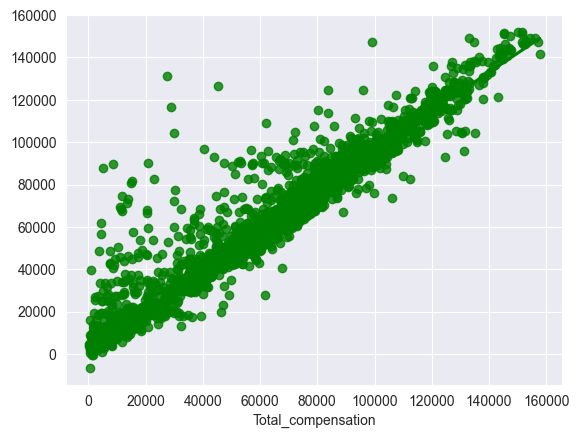

In [83]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green')

### 
Difference between Actual and Predicted Values

In [84]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
5405,28863.22,20708.404524,8154.815476
3613,67901.79,68446.915261,-545.125261
5852,68595.79,69304.042410,-708.252410
8382,67482.62,68040.327799,-557.707799
6141,74570.80,72486.412182,2084.387818
...,...,...,...
12929,4999.57,4733.201187,266.368813
303,110775.20,110264.247232,510.952768
6045,118127.60,118220.796996,-93.196996
6745,52035.48,46101.673985,5933.806015
